# Версия один
## *Готово*

In [1]:
import requests
import json
import random
import time     
from pprint import pprint
from bs4 import BeautifulSoup
import seaborn as sns
import pandas as pd 

In [2]:
version1 = pd.read_csv('version_01.csv')

In [3]:

def adder_analyze(analys):
    lengths = []
    sentences_am = []
    sentences_max = []
    sentences_mean = []
    from razdel import sentenize

    for row in analys['text']:
        sentences_each_len= []
        sentences = [i.text for i in list(sentenize(row))]
        lengths.append(len(row))
        sentences_am.append(len(sentences))
        for each_sen in sentences:
            sentences_each_len.append(len(each_sen))

        sentences_max.append(max(sentences_each_len))
        sentences_mean.append(sum(sentences_each_len)/len(sentences_each_len))

    analys['length'] = lengths
    analys['sentences'] = sentences_am
    analys['sentences_mean'] = sentences_mean
    return analys


In [4]:

version1 = adder_analyze(version1)
version1.describe()

,length,sentences,sentences_mean
count,2407.000000,2407.000000,2407.000000
mean,2022.151641,11.280017,221.511658
std,1773.479320,11.535468,204.641726
min,20.000000,1.000000,20.000000
25%,729.500000,4.000000,132.900000
50%,1499.000000,7.000000,180.333333
75%,2706.000000,15.000000,251.535714
max,9705.000000,86.000000,4781.500000


<Axes: >

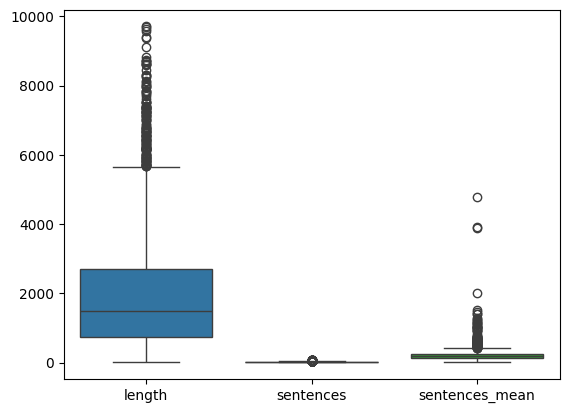

In [5]:
sns.boxplot(version1)

In [6]:
pprint(pd.read_csv('version_01.csv').iloc[0].text)

('Приглашаем вас стать участником эксперимента по маркировке \r\n'
 'технических средств реабилитации! Для вступления в рабочую группу и участия '
 'в эксперименте необходимо направить заявку на участие  '
 '(/upload/%D0%97%D0%B0%D1%8F%D0%B2%D0%BA%D0%B0_%D0%BD%D0%B0_%D1%83%D1%87%D0%B0%D1%81%D1%82%D0%B8%D0%B5_%D0%B2_%D1%8D%D0%BA%D1%81%D0%BF%D0%B5%D1%80%D0%B8%D0%BC%D0%B5%D0%BD%D1%82%D0%B5_%D1%82%D1%81%D1%80_.docx '
 ') на адрес электронной почты: tehsr@crpt.ru  (mailto:tehsr@crpt.ru ). '
 'Зарегистрированные участники получат возможность участвовать в\xa0'
 'проектно-экспертных и\xa0рабочих группах, доступ к\xa0технической '
 'документации и\xa0личному кабинету участника, поддержку специалистов системы '
 'маркировки «Честный знак» по\xa0настройке процессов нанесения кодов на\xa0'
 'продукцию и\xa0других бизнес-процессов, предоставление любой информации о\xa0'
 'маркировке. Отправить письмо Скачать шаблон заявки '
 '(/upload/%D0%97%D0%B0%D1%8F%D0%B2%D0%BA%D0%B0_%D0%BD%D0%B0_%D1%83%D1%87%

In [7]:
import pandas as pd
from pprint import pprint
from langchain_community.document_loaders.csv_loader import CSVLoader
from langchain_community.document_loaders.csv_loader import UnstructuredCSVLoader
from nltk.tokenize import sent_tokenize
loader = CSVLoader(file_path='version_01.csv')
data = loader.load()

In [8]:
import pandas as pd
from langchain_text_splitters import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=2000,
    separators=['\n\n', '. ', 'Прочие ', 'Код вида ', 'Вид продукции '],
    chunk_overlap = 300,
    length_function=len,
    is_separator_regex=False,
)

texts = text_splitter.split_documents(data)
mms = pd.DataFrame({
    'document_len' :[len(i.page_content) for i in texts],
    'amount_sent': [len(sent_tokenize(i.page_content)) for i in texts]

    })

mms.describe()

,document_len,amount_sent
count,3929.000000,3929.000000
mean,1303.026724,8.138203
std,603.090904,5.369825
min,26.000000,1.000000
25%,772.000000,4.000000
50%,1460.000000,7.000000
75%,1863.000000,11.000000
max,3925.000000,38.000000


In [9]:
mms.sort_values('document_len', ascending=False)

,document_len,amount_sent
2950,3925,1
2718,3871,2
2317,3200,2
43,2883,2
2093,2810,2
...,...,...
508,50,1
1600,46,1
507,35,1
2717,33,1


In [10]:
pprint(texts[2718].page_content)

('. Общие положения ППРФ от 28.02.2019 №224 действие настоящих Правил не '
 'распространяется на: а) табачную продукцию, находящуюся на временном '
 'хранении либо помещенную под таможенную процедуру таможенного склада; б) '
 'табачную продукцию, помещаемую под таможенную процедуру таможенного транзита '
 'для перевозки (транспортировки) по таможенной территории Евразийского '
 'экономического союза иностранных товаров от таможенного органа в месте '
 'прибытия до таможенного органа в месте убытия; в) табачную продукцию, '
 'помещаемую под таможенную процедуру таможенного транзита для перевозки '
 '(транспортировки) по таможенной территории Евразийского экономического союза '
 'иностранных товаров от таможенного органа в месте прибытия до внутреннего '
 'таможенного органа; г) табачную продукцию, помещенную под таможенные '
 'процедуры в целях ее вывоза за пределы таможенной территории Евразийского '
 'экономического союза; д) табачную продукцию, производимую в целях ее вывоза '
 'на т

_______________________________________
# Вторые размеченные данные
## Готово

In [11]:
version2= pd.read_csv('version_02.csv')
version2 = adder_analyze(version2)

In [12]:
version2.describe()

,length,sentences,sentences_mean
count,95.000000,95.000000,95.000000
mean,19897.926316,117.947368,185.798110
std,8646.010098,60.936550,68.638219
min,10115.000000,25.000000,79.534392
25%,13242.000000,71.000000,143.801400
50%,16554.000000,96.000000,168.043011
75%,26422.500000,162.000000,195.008044
max,43635.000000,293.000000,426.000000


In [13]:
pprint(version2.iloc[67].text)

('\t\t\t\t\tк\xa0Честному Сообществу! Производитель/Импортер '
 'Производитель/Импортер Представительства ДРУ Иностранные производители '
 'Дистрибьютор Медицинская организация Аптека Производитель/Импортер '
 'Представительства ДРУ Иностранные производители Дистрибьютор Медицинская '
 'организация Аптека Поставщики расходных материалов Интеграторы Интеграторы '
 'ПО Программное обеспечение Операторы ЭДО Оборудование для нанесения '
 '(сериализация) Принтеры этикеток Оборудование для считывания (верификация и '
 'агрегация) Ручные сканеры и ТСД Поставщики расходных материалов Интеграторы '
 'Интеграторы ПО Программное обеспечение Операторы ЭДО Оборудование для '
 'нанесения (сериализация) Принтеры этикеток Оборудование для считывания '
 '(верификация и агрегация) Ручные сканеры и ТСД Поставщики расходных '
 'материалов Интеграторы Интеграторы ПО Программное обеспечение Операторы ЭДО '
 'Оборудование для нанесения (сериализация) Принтеры этикеток Оборудование для '
 'считывания (верифик

In [14]:
import pandas as pd
from pprint import pprint
from langchain_community.document_loaders.csv_loader import CSVLoader
from langchain_community.document_loaders.csv_loader import UnstructuredCSVLoader
from nltk.tokenize import sent_tokenize
loader2 = CSVLoader(file_path='version_02.csv')
data2 = loader2.load()

In [15]:
import pandas as pd
from langchain_text_splitters import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=3800,
    separators=['\r\n', '. ', ',','Не нашли что искали?', 'Участник', ' '],
    chunk_overlap = 200,
    length_function=len,
    is_separator_regex=False,
)

texts2 = text_splitter.split_documents(data2)
mms = pd.DataFrame({
    'document_len' :[len(i.page_content) for i in texts2],
    'amount_sent': [len(sent_tokenize(i.page_content)) for i in texts2]

    })

mms.describe()

,document_len,amount_sent
count,624.000000,624.000000
mean,3080.177885,20.116987
std,1037.740430,9.885578
min,53.000000,1.000000
25%,2936.250000,13.000000
50%,3570.500000,20.500000
75%,3720.000000,26.000000
max,3800.000000,59.000000


In [16]:
mms.sort_values('document_len', ascending=False)[:30]

,document_len,amount_sent
178,3800,12
523,3800,35
498,3799,32
119,3799,27
61,3799,27
601,3798,12
67,3797,24
111,3797,37
125,3797,24
586,3797,2


In [17]:
pprint(texts2[528].page_content)

('. Москва, ул. Большая Новодмитровская, д. 14, стр. 2, этаж 4. Русинова Юлия- '
 'Директор по развитию бизнеса, y.rusinova@atol.ru Godex Принтеры этикеток '
 'www.godexintl.com Компания Godex  (https://www.godexintl.com/ '
 '(https://www.godexintl.com ) ?locale=en ). Борис Архипов '
 'borisarkhipov@godexintl.com  (mailto:borisarkhipov@godexintl.com ). ООО '
 '«РБС-Групп» rbsgr.ru 117546 г. Москва, Ступинский проезд, д.7, стр.1, '
 'помещение 1 +7 (495) 320-03-63, rbs@rbsgr.ru Погожева Валентина – '
 'руководитель отдела автоматизации +7 905 553-50-24, 377@rbsgr.ru '
 'https://mact.ru Группа компаний "МАСТ" г. Ярославль, ул. Угличская, д.12 '
 '8(4852)58-14-58 доб.226, mact4@mact.ru TSC Принтеры этикеток, мобильные '
 'принтеры www.tscprinters.com  (https://www.tscprinters.com/%20 ). TSC Auto '
 'ID Technology EMEA GmbH ул. Днепропетровская, 2 117587 г. Москва Российская '
 'Федерация Тел: +7 (495) 646-35-38 Эл. почта: emea_sales@tscprinters.com  '
 '(mailto:emea_sales@tscprinters.com 

______________________________
# Третья версия статей 
## *Готово*

In [18]:
version3= pd.read_csv('version_03.csv')
version3 = adder_analyze(version3)
version3.describe()


,length,sentences,sentences_mean
count,13.000000,13.000000,13.000000
mean,72469.384615,465.615385,155.724474
std,27876.122123,170.593346,21.132942
min,47267.000000,324.000000,98.203125
25%,53021.000000,341.000000,147.362550
50%,61396.000000,359.000000,160.334211
75%,78371.000000,640.000000,171.158501
max,126175.000000,753.000000,175.881818


In [19]:
version3

,text,length,sentences,sentences_mean
0,Регистрация в системе маркировки пива и слабоа...,119549,694,171.158501
1,Общие вопросы ТОП-10 вопросов по маркировке пи...,58374,330,175.881818
2,Список поставщиков расходных материалов Наличи...,78371,476,163.634454
3,Розница. Работа с маркировкой Вопросы и ответы...,58487,334,174.101796
4,ТОП-10 вопросов по ма (https://xn--80ajghhoc2a...,52708,350,149.577143
5,Приглашаем вас присоединиться к системе маркир...,47267,324,144.651235
6,Маркировка лекарств Приглашаем вас присоединит...,61396,380,160.334211
7,Общие вопросы Технологии маркировки Регистраци...,49406,348,140.959770
8,Маркировка медицинских изделий Приглашаем вас ...,126175,724,173.178177
9,Регистрация в системе маркировки антисептиков ...,111795,753,147.362550


In [20]:
import pandas as pd
from pprint import pprint
from langchain_community.document_loaders.csv_loader import CSVLoader
from langchain_community.document_loaders.csv_loader import UnstructuredCSVLoader
from nltk.tokenize import sent_tokenize
loader3 = CSVLoader(file_path='version_03.csv')
data3 = loader3.load()

In [21]:
import pandas as pd
from langchain_text_splitters import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=3400,
    separators=['Задайте вопрос \r\n', "). ", ". ", "Печатающая голова", 'Термотрансферная лента'],
    chunk_overlap = 300,
    length_function=len,
    is_separator_regex=False,
)

texts3 = text_splitter.split_documents(data3)
mms = pd.DataFrame({
    'document_len' :[len(i.page_content) for i in texts3],
    'amount_sent': [len(sent_tokenize(i.page_content)) for i in texts3]

    })

mms.describe()

,document_len,amount_sent
count,394.000000,394.000000
mean,2460.977157,17.203046
std,956.288479,9.584996
min,49.000000,1.000000
25%,1971.500000,11.000000
50%,2852.500000,16.000000
75%,3229.250000,23.000000
max,3399.000000,73.000000


__________________________________
# Загрузка базы

texts, texts2,texts3

In [22]:
dater = [texts, texts2,texts3]

In [23]:
itog = []
for text in dater:
    for j in text:
        itog.append(j)

In [24]:
itog[0]

Document(page_content='text: Приглашаем вас стать участником эксперимента по маркировке \r\nтехнических средств реабилитации! Для вступления в рабочую группу и участия в эксперименте необходимо направить заявку на участие  (/upload/%D0%97%D0%B0%D1%8F%D0%B2%D0%BA%D0%B0_%D0%BD%D0%B0_%D1%83%D1%87%D0%B0%D1%81%D1%82%D0%B8%D0%B5_%D0%B2_%D1%8D%D0%BA%D1%81%D0%BF%D0%B5%D1%80%D0%B8%D0%BC%D0%B5%D0%BD%D1%82%D0%B5_%D1%82%D1%81%D1%80_.docx ) на адрес электронной почты: tehsr@crpt.ru  (mailto:tehsr@crpt.ru ). Зарегистрированные участники получат возможность участвовать в\xa0проектно-экспертных и\xa0рабочих группах, доступ к\xa0технической документации и\xa0личному кабинету участника, поддержку специалистов системы маркировки «Честный знак» по\xa0настройке процессов нанесения кодов на\xa0продукцию и\xa0других бизнес-процессов, предоставление любой информации о\xa0маркировке. Отправить письмо Скачать шаблон заявки (/upload/%D0%97%D0%B0%D1%8F%D0%B2%D0%BA%D0%B0_%D0%BD%D0%B0_%D1%83%D1%87%D0%B0%D1%81%D1%82

__________________________________
## intfloat/multilingual-e5-large

Когда начнется маркировка Морепродуктов?
В каких случаях запрещается продажа Пива с маркировкой?
Как должна проходить приемка товара по парфюму?
Какие товары маркируются?
Что такое разрешительный режим?



In [26]:
from langchain_community.vectorstores.utils import DistanceStrategy
db = FAISS.from_documents(itog,
                          embeddings
                          )
db.distance_strategy = DistanceStrategy.COSINE

db.save_local("faiss_index_multilingual")
print(db.index.ntotal)

Batches: 100%|██████████| 155/155 [08:18<00:00,  3.22s/it]


4947


In [24]:
from langchain_community.vectorstores.utils import DistanceStrategy
db = FAISS.load_local('faiss_index_multilingual',
                           embeddings,
                           allow_dangerous_deserialization = True)
db.distance_strategy = DistanceStrategy.COSINE
db.__dict__

{'embedding_function': HuggingFaceEmbeddings(client=SentenceTransformer(
   (0): Transformer({'max_seq_length': 512, 'do_lower_case': False}) with Transformer model: XLMRobertaModel 
   (1): Pooling({'word_embedding_dimension': 1024, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
   (2): Normalize()
 ), model_name='intfloat/multilingual-e5-large', cache_folder=None, model_kwargs={'device': 0}, encode_kwargs={}, multi_process=False, show_progress=True),
 'index': <faiss.swigfaiss_avx2.IndexFlatL2; proxy of <Swig Object of type 'faiss::IndexFlatL2 *' at 0x0000014B8872C450> >,
 'docstore': <langchain_community.docstore.in_memory.InMemoryDocstore at 0x14a373d0fa0>,
 'index_to_docstore_id': {0: '91a67767-1cf7-4495-8889-70b72165d86e',
  1: 'fbe36e1d-8b99-4f86-8b23-04cf0eb93de3',
  2: '41864096-9b

__________________________________________________
## sentence-transformers/paraphrase-multilingual-mpnet-base-v2

In [64]:
from langchain_community.embeddings.huggingface import HuggingFaceEmbeddings
from langchain_community.vectorstores import FAISS

embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/paraphrase-multilingual-mpnet-base-v2", 
                                   model_kwargs={'device': 0},
                                   show_progress = True)
db = FAISS.from_documents(itog,
                           embeddings,
                           distance_strategy=DistanceStrategy.COSINE)
db.save_local("faiss_index_paraphrase-multilingual-mpnet-base-v2")
print(db.index.ntotal)

Batches: 100%|██████████| 155/155 [00:23<00:00,  6.65it/s]


4947


In [65]:
results_with_scores = db.similarity_search_with_score(query)
for doc, score in results_with_scores:
    print(f"Content: {doc.page_content},\n Metadata: {doc.metadata},\n Score: {score}")

Batches: 100%|██████████| 1/1 [00:00<00:00, 54.01it/s]

Content: . Производство товаров без нанесения маркировки запрещено. Запрещается внутреннее перемещение, производство, перевозка, импорт продукции без нанесенного СИ на товар; с 15 января 2024 года – старт работы с пивом и слабоалкогольными напитками в кегах. Розничные магазины и другие предприятия, осуществляющие продажу пива и слабоалкогольных напитков в кегах, должны передавать в систему маркировки данные о продажах c помощью контрольно-кассовой техники (ККТ), а также сведения о подключении кегов к оборудованию для розлива; Примечание: на первом этапе отсутствует экземплярная прослеживаемость в оптовом звене и передача по электронному документообороту (ЭДО) не требуется. Такая прослеживаемость будет внедрена на втором этапе запуска маркировки, о чем будет сообщено дополнительно после завершения первого этапа. с 1 апреля 2024 года – запрещается вывод из оборота немаркированного пива в кегах; с 1 июня 2024 года – старт обязательного вывода из оборота пива и слабоалкогольных напитков, у

_____________________________________________
## 	symanto/sn-xlm-roberta-base-snli-mnli-anli-xnli

In [70]:
from langchain_community.embeddings.huggingface import HuggingFaceEmbeddings
from langchain_community.vectorstores import FAISS

embeddings = HuggingFaceEmbeddings(model_name="symanto/sn-xlm-roberta-base-snli-mnli-anli-xnli", 
                                   model_kwargs={'device': 0},
                                   show_progress = True)
db = FAISS.from_documents(itog, 
                          embeddings,
                          distance_strategy=DistanceStrategy.COSINE)
db.save_local("faiss_index_sn-xlm-roberta-base-snli-mnli-anli-xnli")
print(db.index.ntotal)

Batches: 100%|██████████| 155/155 [00:24<00:00,  6.34it/s]


4947


In [36]:
query = "Когда начнется маркировка Морепродуктов?"
db = FAISS.load_local("faiss_index_paraphrase-multilingual-mpnet-base-v2",
                           embeddings,
                           allow_dangerous_deserialization = True)


results_with_scores = db.similarity_search_with_score(query)
for doc, score in results_with_scores:
    print(f"Content: {doc.page_content},\n Metadata: {doc.metadata},\n Score: {score}")

Batches: 100%|██████████| 1/1 [00:00<00:00,  8.23it/s]

Content: Прочие кровь человеческая; кровь животных, приготовленная для использования в терапевтических, профилактических или диагностических целях; сыворотки иммунные, фракции крови прочие и иммунологические продукты, модифицированные или немодифицированные, в том числе полученные методами биотехнологии; вакцины, токсины, культуры микроорганизмов (кроме дрожжей) и аналогичные продукты; клеточные культуры, модифицированные или немодифицированные 3003 90 000 0 Лекарственные средства (кроме товаров товарной позиции 3002, 3005 или 3006), состоящие из смеси двух или более компонентов, для использования в терапевтических или профилактических целях, но не расфасованные в виде дозированных лекарственных форм или в формы или упаковки для розничной продажи, прочие 3006 92 000 0 Непригодные фармацевтические средства 3507 90 900 0 Прочие ферменты; ферментные препараты, в другом месте не поименованные или не включенные 3822 12 000 9 Прочие реагенты диагностические или лабораторные на подложке, гото

____________________________________
# Тестирование результатов

In [32]:
from sentence_transformers import SentenceTransformer
from sentence_transformers.models import Pooling, Transformer
from langchain_community.vectorstores.utils import DistanceStrategy
from langchain_community.embeddings.huggingface import HuggingFaceEmbeddings,HuggingFaceInstructEmbeddings
from langchain_community.vectorstores import FAISS
import time 

def get_bi_encoder(bi_encoder_name):
    raw_model = Transformer(model_name_or_path=f'{bi_encoder_name}')

    # Вытаскиваем размер векторов
    bi_encoder_dim = raw_model.get_word_embedding_dimension()
    
    pooling_model = Pooling(
        bi_encoder_dim,
        pooling_mode_cls_token = False,
        pooling_mode_mean_tokens = True
    )
    bi_encoder = SentenceTransformer(
        modules = [raw_model, pooling_model],
        device = 'cuda' # помещаем его на GPU
    )
    
    return bi_encoder, bi_encoder_dim


def str_to_vec(bi_encoder, text):
 
    embeddings = bi_encoder.encode(
        text,
        convert_to_tensor = False,
        show_progress_bar = False
    )

    return embeddings

In [30]:
from sklearn.metrics.pairwise import cosine_similarity

def cos_dis(query, data):
    similarity = cosine_similarity([query], [data])[0][0]

    return similarity

In [31]:
import torch 
torch.cuda.empty_cache()

In [29]:
from langchain_community.embeddings.huggingface import HuggingFaceEmbeddings,HuggingFaceInstructEmbeddings
from langchain_community.vectorstores import FAISS
from langchain_community.vectorstores.utils import DistanceStrategy
def DataBaser(query,
              embeddings,
              bi_encoder,
              db_path = "faiss_index_multilingual"):
    metrics = []
    
                                   
    db = FAISS.load_local(db_path,
                           embeddings,
                           allow_dangerous_deserialization = True)
    db.distance_strategy = DistanceStrategy.COSINE


    results = db.similarity_search(query, k = 5)
    
    query_emb = str_to_vec(bi_encoder, query)
    for resus in results:
        dist = cos_dis(query_emb, str_to_vec(bi_encoder, 
                                             resus.page_content))
        metrics.append(dist)
    
    
    return results, metrics



Когда начнется маркировка Морепродуктов?
В каких случаях запрещается продажа Пива с маркировкой?
Как должна проходить приемка товара по парфюму?
Какие товары маркируются?
Что такое разрешительный режим?

In [8]:
querys = ['Когда вводится разрешительный режим для обуви?',
          "Когда начнется маркировка Морепродуктов?",
          'Какие товары маркируются?',
          'Как должна проходить приемка товара по парфюму?',
          'Разрешительный режим для обуви?',
          'Что такое Data Matrix?',
          'Как маркировать обувь?',
          'Как проводить маркировку лекарств?', 
           'Что такое КМ?',
           'Поставщики',
           'Сроки запуска маркировки упакованной воды',
           'Технические решения для маркировки упакованной воды']
emb_models = {'intfloat/multilingual-e5-large' : 'main_vectorstore',
               "symanto/sn-xlm-roberta-base-snli-mnli-anli-xnli":'faiss_index_sn-xlm-roberta-base-snli-mnli-anli-xnli',
               "sentence-transformers/paraphrase-multilingual-mpnet-base-v2":'faiss_index_paraphrase-multilingual-mpnet-base-v2'}

itog = {'intfloat/multilingual-e5-large': [],
              "symanto/sn-xlm-roberta-base-snli-mnli-anli-xnli": [],
               "sentence-transformers/paraphrase-multilingual-mpnet-base-v2": []}




for model in emb_models:
    embeddings = HuggingFaceEmbeddings(model_name= model, 
                                  model_kwargs={'device': 0},
                                   show_progress = True)
    for query in querys:
        bi_encoder, dim = get_bi_encoder(model)
        results, metrics,  = DataBaser(query,
                                     embeddings,
                                     bi_encoder,
                                     db_path=emb_models[model]
                                     )
        itog[model].append(metrics)
        

        
    
   

NameError: name 'get_bi_encoder' is not defined

In [34]:
len(itog['intfloat/multilingual-e5-large'])

12

In [25]:
itog

[Document(page_content='text: Приглашаем вас стать участником эксперимента по маркировке \r\nтехнических средств реабилитации! Для вступления в рабочую группу и участия в эксперименте необходимо направить заявку на участие  (/upload/%D0%97%D0%B0%D1%8F%D0%B2%D0%BA%D0%B0_%D0%BD%D0%B0_%D1%83%D1%87%D0%B0%D1%81%D1%82%D0%B8%D0%B5_%D0%B2_%D1%8D%D0%BA%D1%81%D0%BF%D0%B5%D1%80%D0%B8%D0%BC%D0%B5%D0%BD%D1%82%D0%B5_%D1%82%D1%81%D1%80_.docx ) на адрес электронной почты: tehsr@crpt.ru  (mailto:tehsr@crpt.ru ). Зарегистрированные участники получат возможность участвовать в\xa0проектно-экспертных и\xa0рабочих группах, доступ к\xa0технической документации и\xa0личному кабинету участника, поддержку специалистов системы маркировки «Честный знак» по\xa0настройке процессов нанесения кодов на\xa0продукцию и\xa0других бизнес-процессов, предоставление любой информации о\xa0маркировке. Отправить письмо Скачать шаблон заявки (/upload/%D0%97%D0%B0%D1%8F%D0%B2%D0%BA%D0%B0_%D0%BD%D0%B0_%D1%83%D1%87%D0%B0%D1%81%D1%8

In [24]:
import pandas as pd
new_w = {}

for i in itog:
    metric = []
    for j in itog[i]:
        metric.append(max(j))
    new_w[i] = metric


TypeError: list indices must be integers or slices, not Document

Text(0, 0.5, 'Косинусная близость чанка базы и запроса')

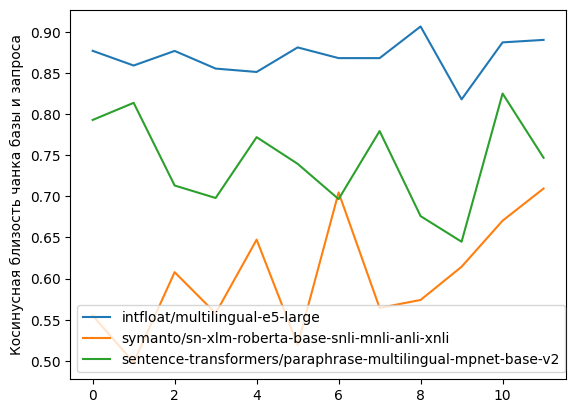

In [40]:
from matplotlib import pyplot as plt
pd.DataFrame(new_w).plot()
plt.ylabel('Косинусная близость чанка базы и запроса')

_____________________________________

In [37]:
from langchain_community.embeddings.huggingface import HuggingFaceEmbeddings,HuggingFaceInstructEmbeddings
from langchain_community.vectorstores import FAISS
import time
from langchain_community.vectorstores.utils import DistanceStrategy
def DataBaser_time(query,
              embeddings,
              db_path = "faiss_index_multilingual"):
    
    
                                   
    db = FAISS.load_local(db_path,
                           embeddings,
                           allow_dangerous_deserialization = True)
    db.distance_strategy = DistanceStrategy.COSINE

    start = time.time()
    results = db.similarity_search(query, k = 5)
    return time.time() - start



In [38]:
timer = {}
for model in emb_models:
    embeddings = HuggingFaceEmbeddings(model_name= model, 
                                  model_kwargs={'device': 'cpu'},
                                   show_progress = True)
    timer[model] = []
    for query in querys:
        result  = DataBaser_time(query,
                                     embeddings,
                                     db_path=emb_models[model])
        timer[model].append(result * 100)
        

Batches: 100%|██████████| 1/1 [00:00<00:00, 21.55it/s]


Text(0, 0.5, 'Время поиска в базе, сек')

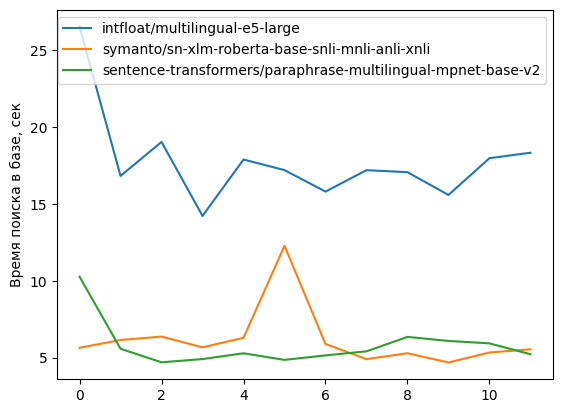

In [39]:
pd.DataFrame(timer).plot()
plt.ylabel('Время поиска в базе, сек')

____________________________________

In [24]:
new_info = []
for i in range(len(itog)):
    content = itog[i].page_content.replace('text:', '').replace(u'\xa0', u' ').replace('\r\n', ' ')
    if content[0] == " " :
        content = content[1:]
    elif content[:2] == '. ':
        content = content[2:]
    new_info.append(content)


In [25]:
len(new_info)

4947

In [26]:
import pandas as pd 
dater = pd.DataFrame({'Тексты' : new_info,
              'Длины': [len(i) for i in new_info]})
dater.sort_values('Длины', ascending=True)

,Тексты,Длины
534,КМ — код маркировки.,20
2717,Согласно пункту 4 раздела I,27
507,ПО — программное обеспечение.,29
1600,У контейнеров отсутствует срок хранения.,40
508,КИГУ — код индивидуальной групповой упаковки,44
...,...,...
3990,Разработка компании «Дэнси Софт» — программа д...,3797
4452,Наши решения по автоматизации рабочих процессо...,3798
4107,Постановление Правительства РФ от 14.11.2022 N...,3798
2718,Общие положения ППРФ от 28.02.2019 №224 действ...,3869


In [27]:
dater.describe()

,Длины
count,4947.000000
mean,1615.308065
std,950.336424
min,20.000000
25%,870.000000
50%,1659.000000
75%,1950.000000
max,3919.000000


<Axes: >

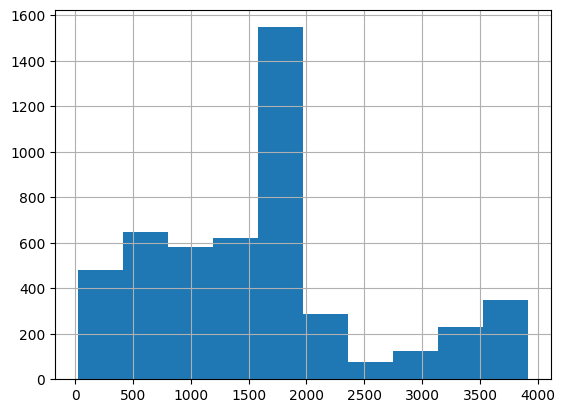

In [28]:
dater['Длины'].hist()

In [44]:
dater.sort_values('Длины', ascending=False)

,Тексты,Длины
2950,В соответствии с пунктом 4 ППРФ от 05.07.2019 ...,3919
2718,Общие положения ППРФ от 28.02.2019 №224 действ...,3869
4452,Наши решения по автоматизации рабочих процессо...,3798
4107,Постановление Правительства РФ от 14.11.2022 N...,3798
3990,Разработка компании «Дэнси Софт» — программа д...,3797
...,...,...
508,КИГУ — код индивидуальной групповой упаковки,44
1600,У контейнеров отсутствует срок хранения.,40
507,ПО — программное обеспечение.,29
2717,Согласно пункту 4 раздела I,27


In [34]:
dater.loc[dater['Длины'] < 870.000000].sort_values('Длины', ascending=False)

,Тексты,Длины
1209,"Инструкция, описывающая пошаговые действия по ...",869
3395,Время обработки документа зависит от общей заг...,868
2436,Всю информацию в универсальном передаточном до...,868
3413,Также участник может обратиться к поставщику д...,868
4601,Задайте вопрос \t\t\t в службу поддержки Ест...,868
...,...,...
508,КИГУ — код индивидуальной групповой упаковки,44
1600,У контейнеров отсутствует срок хранения.,40
507,ПО — программное обеспечение.,29
2717,Согласно пункту 4 раздела I,27


In [47]:
pprint(dater.iloc[2950]['Тексты'])

('В соответствии с пунктом 4 ППРФ от 05.07.2019 N860  '
 '(https://xn--80ajghhoc2aj1c8b.xn--p1ai/upload/860_new.pdf ) действие '
 'настоящих Правил не распространяется на: а) обувные товары, находящиеся на '
 'временном хранении либо помещенные под таможенную процедуру таможенного '
 'склада; б) обувные товары, помещаемые под таможенную процедуру таможенного '
 'транзита для перевозки (транспортировки) по таможенной территории '
 'Евразийского экономического союза иностранных обувных товаров от таможенного '
 'органа в месте прибытия до таможенного органа в месте убытия; в) обувные '
 'товары, помещаемые под таможенную процедуру таможенного транзита для '
 'перевозки (транспортировки) по таможенной территории Евразийского '
 'экономического союза иностранных товаров от таможенного органа в месте '
 'прибытия до внутреннего таможенного органа; г) обувные товары, помещенные '
 'под таможенные процедуры в целях их вывоза за пределы таможенной территории '
 'Евразийского экономического сою

In [33]:
pprint(dater.iloc[2776]['Тексты'])

('Для подачи сведений о вводе товаров в оборот через личный кабинет системы '
 'маркировки Честный Знак в ручном режиме необходимо произвести следующие '
 'действия: 1. Авторизоваться в личном кабинете системы маркировки с '
 'использованием сертификата квалифицированной электронной подписи. 2. Зайти в '
 'раздел «Документы» с помощью соответствующей вкладки в верхней части экрана. '
 '3. Открыть форму добавления нового документа, нажав на кнопку «Создать» и '
 'выбрать в выпадающем списке «Ввод в оборот». 4. Выбрать вид документа из '
 'предложенных вариантов. 5. Заполнить все необходимые поля в документе и '
 'перейти к добавлению товаров, нажав на кнопку «Добавить товары». 6. После '
 'нажатия на кнопку «+Добавить товар» выбрать товары из списка предложенных, '
 'воспользовавшись при необходимости фильтрами по столбцам, или нажать на '
 'кнопку «Загрузить» для загрузки файла с кодами идентификации (КИ) в формате '
 'xls или xlsx. 7. Далее в открывшейся форме с помощью специальных фл

In [36]:
pprint(dater.iloc[1209]['Тексты'])

('Инструкция, описывающая пошаговые действия по предоставлению сведений о '
 'выводе товаров из оборота в системе маркировки: Вывод из оборота  '
 '(https://xn--80ajghhoc2aj1c8b.xn--p1ai/business/doc/?id=%D0%92%D1%8B%D0%B2%D0%BE%D0%B4_%D0%B8%D0%B7_%D0%BE%D0%B1%D0%BE%D1%80%D0%BE%D1%82%D0%B0.html '
 ') , размещена на сайте честныйзнак.рф  '
 '(https://xn--80ajghhoc2aj1c8b.xn--p1ai/business/projects/dairy/ ) и в '
 'разделе "Помощь" https://water.crpt.ru/help/list  '
 '(https://water.crpt.ru/help/list ) личного кабинета системы маркировки. В '
 'Честном сообществе https://markirovka.ru/video_instructions/  '
 '(https://markirovka.ru/video_instructions/ ) собраны пошаговые '
 'видеоинструкции по всем вопросам и процессам системы маркировки. Есть '
 'вопросы по выводу из оборота? Заходите в виртуальное обучающее пространство  '
 '(https://markirovka.ru/virtual_education/ ) и за 5-10 минут пройдите все '
 'шаги.')


In [55]:
dater.iloc[2950]['Тексты']

'В соответствии с пунктом 4 ППРФ от 05.07.2019 N860  (https://xn--80ajghhoc2aj1c8b.xn--p1ai/upload/860_new.pdf ) действие настоящих Правил не распространяется на: а) обувные товары, находящиеся на временном хранении либо помещенные под таможенную процедуру таможенного склада; б) обувные товары, помещаемые под таможенную процедуру таможенного транзита для перевозки (транспортировки) по таможенной территории Евразийского экономического союза иностранных обувных товаров от таможенного органа в месте прибытия до таможенного органа в месте убытия; в) обувные товары, помещаемые под таможенную процедуру таможенного транзита для перевозки (транспортировки) по таможенной территории Евразийского экономического союза иностранных товаров от таможенного органа в месте прибытия до внутреннего таможенного органа; г) обувные товары, помещенные под таможенные процедуры в целях их вывоза за пределы таможенной территории Евразийского экономического союза; д) обувные товары, производимые в целях их вывоза

In [52]:
tester = {'Тексты':,
          'Длины':}
for row in rows:


In [57]:
for i in range(len(dater)):
    if 'В соответствии с пунктом 4 ППРФ от 05.07.2019 N860' in dater.iloc[i]['Тексты'] :
        print(i)

2950


In [61]:
dater.iloc[2950]['Тексты']

'В соответствии с пунктом 4 ППРФ от 05.07.2019 N860  (https://xn--80ajghhoc2aj1c8b.xn--p1ai/upload/860_new.pdf ) действие настоящих Правил не распространяется на: а) обувные товары, находящиеся на временном хранении либо помещенные под таможенную процедуру таможенного склада; б) обувные товары, помещаемые под таможенную процедуру таможенного транзита для перевозки (транспортировки) по таможенной территории Евразийского экономического союза иностранных обувных товаров от таможенного органа в месте прибытия до таможенного органа в месте убытия; в) обувные товары, помещаемые под таможенную процедуру таможенного транзита для перевозки (транспортировки) по таможенной территории Евразийского экономического союза иностранных товаров от таможенного органа в месте прибытия до внутреннего таможенного органа; г) обувные товары, помещенные под таможенные процедуры в целях их вывоза за пределы таможенной территории Евразийского экономического союза; д) обувные товары, производимые в целях их вывоза

In [50]:
s

Тексты    В соответствии с пунктом 4 ППРФ от 05.07.2019 ...
Длины                                                  3919
Тексты    Для подачи сведений о вводе товаров в оборот ч...
Длины                                                  1949
Тексты    Для подачи сведений о вводе товаров в оборот ч...
Длины                                                  1949
dtype: object

In [35]:
dater.iloc[1]

'Сроки и этапы эксперимента Сроки эксперимента Начало эксперимента по маркировке и прослеживанию технических средств реабилитации с 15 октября 2023 года по 31 августа 2024 года 15 октября 2023 года начинается эксперимент по маркировке отдельных видов технических средств реабилитации средствами идентификации. В рамках эксперимента пройдет подготовка и отработка решений для всех участников оборота товаров.'

In [38]:
import faiss
import numpy as np

index = faiss.IndexFlatIP(1024)
faiss.normalize_L2(encoded_data)
index.add(encoded_data)

In [39]:
query = 'Маркировка технических средств реабилитации'
query = model.encode(query)
query = np.array([query])
faiss.normalize_L2(query)
distance, add = index.search(query, k = 4)

In [40]:
distance, add

(array([[0.8823494 , 0.87105846, 0.86862814, 0.859732  ]], dtype=float32),
 array([[0, 2, 1, 3]], dtype=int64))

In [41]:
new_info[0]

' Приглашаем вас стать участником эксперимента по маркировке \r\nтехнических средств реабилитации! Для вступления в рабочую группу и участия в эксперименте необходимо направить заявку на участие  (/upload/%D0%97%D0%B0%D1%8F%D0%B2%D0%BA%D0%B0_%D0%BD%D0%B0_%D1%83%D1%87%D0%B0%D1%81%D1%82%D0%B8%D0%B5_%D0%B2_%D1%8D%D0%BA%D1%81%D0%BF%D0%B5%D1%80%D0%B8%D0%BC%D0%B5%D0%BD%D1%82%D0%B5_%D1%82%D1%81%D1%80_.docx ) на адрес электронной почты: tehsr@crpt.ru  (mailto:tehsr@crpt.ru ). Зарегистрированные участники получат возможность участвовать в проектно-экспертных и рабочих группах, доступ к технической документации и личному кабинету участника, поддержку специалистов системы маркировки «Честный знак» по настройке процессов нанесения кодов на продукцию и других бизнес-процессов, предоставление любой информации о маркировке. Отправить письмо Скачать шаблон заявки (/upload/%D0%97%D0%B0%D1%8F%D0%B2%D0%BA%D0%B0_%D0%BD%D0%B0_%D1%83%D1%87%D0%B0%D1%81%D1%82%D0%B8%D0%B5_%D0%B2_%D1%8D%D0%BA%D1%81%D0%BF%D0%B5%

In [81]:
index.docstore

AttributeError: 'IndexFlatIP' object has no attribute 'docstore'

In [62]:
from langchain_community.vectorstores import FAISS
from langchain_community.embeddings.huggingface import HuggingFaceEmbeddings
from langchain_community.vectorstores.utils import DistanceStrategy
embeddings = HuggingFaceEmbeddings(model_name="intfloat/multilingual-e5-large", 
                                   model_kwargs={'device': 0},
                                    #encode_kwargs = {'normalize_embeddings': True},
                                   show_progress = True)
vdb = FAISS.from_texts(new_info,
                             embeddings)
                            #distance_strategy = DistanceStrategy.MAX_INNER_PRODUCT)

vdb.save_local('main_vectorstore_more_vers')

c:\Users\konst\anaconda3\envs\llm\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Batches:  34%|███▍      | 53/155 [04:41<09:01,  5.30s/it]


KeyboardInterrupt: 

emb_models = {'intfloat/multilingual-e5-large' : 'main_vectorstore',
               "symanto/sn-xlm-roberta-base-snli-mnli-anli-xnli":'faiss_index_sn-xlm-roberta-base-snli-mnli-anli-xnli',
               "sentence-transformers/paraphrase-multilingual-mpnet-base-v2":'faiss_index_paraphrase-multilingual-mpnet-base-v2'}

In [27]:
from langchain_community.vectorstores import FAISS
from langchain_community.embeddings.huggingface import HuggingFaceEmbeddings
from langchain_community.vectorstores.utils import DistanceStrategy
embeddings = HuggingFaceEmbeddings(model_name='symanto/sn-xlm-roberta-base-snli-mnli-anli-xnli', 
                                   model_kwargs={'device': 0},
                                    encode_kwargs = {'normalize_embeddings': True},
                                   show_progress = True)
vdb = FAISS.from_texts(new_info,
                             embeddings,
                            distance_strategy = DistanceStrategy.MAX_INNER_PRODUCT)

vdb.save_local('faiss_index_sn-xlm-roberta-base-snli-mnli-anli-xnli')

Batches: 100%|██████████| 155/155 [01:01<00:00,  2.53it/s]


In [28]:
from langchain_community.vectorstores import FAISS
from langchain_community.embeddings.huggingface import HuggingFaceEmbeddings
from langchain_community.vectorstores.utils import DistanceStrategy
embeddings = HuggingFaceEmbeddings(model_name='sentence-transformers/paraphrase-multilingual-mpnet-base-v2', 
                                   model_kwargs={'device': 0},
                                    encode_kwargs = {'normalize_embeddings': True},
                                   show_progress = True)
vdb = FAISS.from_texts(new_info,
                             embeddings,
                            distance_strategy = DistanceStrategy.MAX_INNER_PRODUCT)

vdb.save_local('faiss_index_paraphrase-multilingual-mpnet-base-v2')

Batches: 100%|██████████| 155/155 [01:00<00:00,  2.57it/s]


In [1]:
from langchain_community.embeddings.huggingface import HuggingFaceEmbeddings
from langchain_community.vectorstores import FAISS



embeddings = HuggingFaceEmbeddings(model_name='symanto/sn-xlm-roberta-base-snli-mnli-anli-xnli', 
                                   model_kwargs={'device': 0},
                                    encode_kwargs = {'normalize_embeddings': True},
                                   show_progress = True)

db = FAISS.load_local(
    'main_vectorstore',
    embeddings=embeddings,
    allow_dangerous_deserialization = True
)

c:\Users\konst\anaconda3\envs\llm\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [28]:
query = "Когда начнется маркировка рыбы?"
db = FAISS.load_local("main_vectorstore",
                           embeddings,
                           allow_dangerous_deserialization = True)


results_with_scores = db.similarity_search_with_score(query,
                                                      search_type="similarity_score_threshold", search_kwargs={"score_threshold": 0.9})
for doc, score in results_with_scores:
    print(f"Content: {doc.page_content},\n Metadata: {doc.metadata},\n Score: {score}")

Batches: 100%|██████████| 1/1 [00:00<00:00,  3.50it/s]

Content: Сроки обязательной маркировки Этапы запуска обязательной маркировки и прослеживания Начало эксперимента по маркировке и прослеживанию икры осетровых и лососевых рыб С 15 апреля 2023 года по 31 марта 2024 года 15 апреля 2023 года стартовал эксперимент по маркировке и прослеживанию пищевой икры осетровых и лососевых рыб, подлежащей маркировке средствами идентификации. В рамках эксперимента пройдет подготовка и отработка решений для всех участников оборота товаров. Старт обязательной регистрации в системе маркировки С 01 апреля 2024 года Производители и импортеры должны подать заявление на регистрацию в системе маркировки с 1 апреля 2024 года, но не позднее 7 календарных дней со дня возникновения необходимости осуществления участником оборота икры деятельности, связанной с вводом в оборот, и (или) оборотом, и (или) выводом из оборота икры Старт маркировки всех видов икры осетровых и икры лососевых С 01 мая 2024 года Производители и импортеры всех видов икры осетровых и икры лосос

In [36]:
ret = db.as_retriever( search_type="similarity_score_threshold",  
                       search_kwargs={"score_threshold": 0.25,
                                      'k': 1})
ret.invoke("Когда начнется маркировка морепродуктов?")

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches: 100%|██████████| 1/1 [00:00<00:00,  9.05it/s]


[Document(page_content='Сроки обязательной маркировки Этапы запуска обязательной маркировки и прослеживания Начало эксперимента по маркировке и прослеживанию икры осетровых и лососевых рыб С 15 апреля 2023 года по 31 марта 2024 года 15 апреля 2023 года стартовал эксперимент по маркировке и прослеживанию пищевой икры осетровых и лососевых рыб, подлежащей маркировке средствами идентификации. В рамках эксперимента пройдет подготовка и отработка решений для всех участников оборота товаров. Старт обязательной регистрации в системе маркировки С 01 апреля 2024 года Производители и импортеры должны подать заявление на регистрацию в системе маркировки с 1 апреля 2024 года, но не позднее 7 календарных дней со дня возникновения необходимости осуществления участником оборота икры деятельности, связанной с вводом в оборот, и (или) оборотом, и (или) выводом из оборота икры Старт маркировки всех видов икры осетровых и икры лососевых С 01 мая 2024 года Производители и импортеры всех видов икры осетров

In [18]:
from pprint import pprint
pprint(results_with_scores[1][0].page_content)

('Сроки обязательной маркировки Этапы запуска обязательной маркировки и '
 'прослеживания Начало эксперимента по маркировке и прослеживанию икры '
 'осетровых и лососевых рыб С 15 апреля 2023 года по 31 марта 2024 года 15 '
 'апреля 2023 года стартовал эксперимент по маркировке и прослеживанию пищевой '
 'икры осетровых и лососевых рыб, подлежащей маркировке средствами '
 'идентификации. В рамках эксперимента пройдет подготовка и отработка решений '
 'для всех участников оборота товаров. Старт обязательной регистрации в '
 'системе маркировки С 01 апреля 2024 года Производители и импортеры должны '
 'подать заявление на регистрацию в системе маркировки с 1 апреля 2024 года, '
 'но не позднее 7 календарных дней со дня возникновения необходимости '
 'осуществления участником оборота икры деятельности, связанной с вводом в '
 'оборот, и (или) оборотом, и (или) выводом из оборота икры Старт маркировки '
 'всех видов икры осетровых и икры лососевых С 01 мая 2024 года Производители '
 'и имп